** Customer Churn Analysis - Telcom Industry

**Business Problem**
The goal of this project is to analyze customer churn and identify key factors that influence wheteher customers leave a telcom service. Reducing churn is critical for improving customer retention and long-term revenue.

**Dataset Overview**
The dataset contains information on 7,043 telcom customers. Churn indicate wheter a customer left the company within the last month.

Features include
* Customer demographics
* Service usage (internet, streaming, tech support)
* Billing information (monthly and total charges)
* Contract types
* Customer tenure

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml

churn = fetch_openml(name="Telco-Customer-Churn", version=1, as_frame=True)
df=churn.frame

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,0,No,No,45,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [3]:
#How big is the problem
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [4]:
round(df['Churn'].value_counts(normalize=True)*100,2)

,proportion
Churn,
No,73.46
Yes,26.54


In [5]:
df.groupby('Churn')['MonthlyCharges'].mean()

,MonthlyCharges
Churn,
No,61.265124
Yes,74.441332


In [6]:
df.groupby('Churn')['tenure'].mean()

,tenure
Churn,
No,37.569965
Yes,17.979133


**Exploratory Data Analysis (EDA)**
Initial Analysis was conducted to understand churn behaviour and identify patterns across tenure, pricing, and service usage.

Key Observations:
* Overall churn rate is approximately 27%
* Customers with higher monthly charges show higher churn
* Customers with shorter ternure churn more frequently
* Month-to-month contracts have highest churn rates

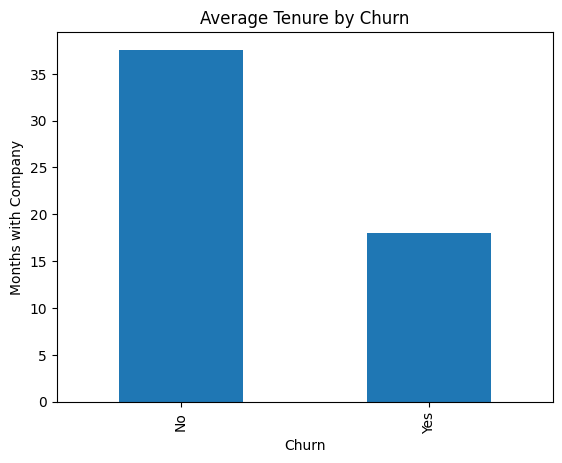

In [7]:
import matplotlib.pyplot as plt

df.groupby('Churn')['tenure'].mean().plot(kind='bar')
plt.title("Average Tenure by Churn")
plt.ylabel("Months with Company")
plt.show()

In [8]:
df.groupby(['Contract','Churn']).size().unstack()

Churn,No,Yes
Contract,,
'One year',1307,166
'Two year',1647,48
Month-to-month,2220,1655


In [9]:
#risk segmentation
df.groupby(['InternetService', 'Churn']).size().unstack()

Churn,No,Yes
InternetService,,
'Fiber optic',1799,1297
DSL,1962,459
No,1413,113


In [10]:
df.groupby(['TechSupport','Churn']).size().unstack()

Churn,No,Yes
TechSupport,,
'No internet service',1413,113
No,2027,1446
Yes,1734,310


In [11]:
df.groupby(['Contract','Churn']).size().unstack()

Churn,No,Yes
Contract,,
'One year',1307,166
'Two year',1647,48
Month-to-month,2220,1655


In [12]:
df['InternetService'].value_counts()

,count
InternetService,
'Fiber optic',3096
DSL,2421
No,1526


In [13]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
'No internet service',1526


In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [16]:
for col in df.columns:
  print(col, df[col].nunique())

gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


**Data Preparation**
Before modelling, the dataset was cleaned and transformed:

* Converted TotalCharges to numeric
* Handled missing values
* Encoded categorical variables using one-hot encoding
* Converted churn into binary target variable

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()

np.int64(11)

In [18]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.shape

(7043, 31)

In [19]:
#drop NaNs
df_encoded = df_encoded.dropna()
df_encoded.shape

(7032, 31)

In [20]:
#Convert churn to numeric target
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes':1,'No':0})

**Modeling Approach**
A logistic regression model was used to predict customer churn based on:
* Service usage
* Contract tpye
* Tenure
* Billing information

Step performed:
* features and target separate
* training and testing split applied
* logistic regression model trained

The goal is not only prediction accuracy but identifying the main drivers of churn

In [21]:
#split features vs target
x= df_encoded.drop('Churn',axis=1)
y = df_encoded['Churn']

In [22]:
#train churn prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model= LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

model.score(x_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7874911158493249

**Model Performance**
The logistic regression model achieved an accuracy of approximatly 79%. This means the model is able to correctly identify churn behavior for most customers and can help flag high-risk segments for retention efforts

In [ ]:
importance = pd.DataFrame({
    'Feature':x.columns,
    'Coefficient':model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)

importance.head(10)

,Feature,Coefficient
25,Contract_Month-to-month,0.752525
26,PaperlessBilling_Yes,0.278265
0,SeniorCitizen,0.259573
28,PaymentMethod_'Electronic check',0.254797
12,OnlineSecurity_No,0.254164
18,TechSupport_No,0.240105
14,OnlineBackup_No,0.095665
23,StreamingMovies_Yes,0.093007
21,StreamingTV_Yes,0.083211
5,Partner_Yes,0.048263


<Axes: title={'center': 'Key Drivers of Customer Churn'}, ylabel='Feature'>

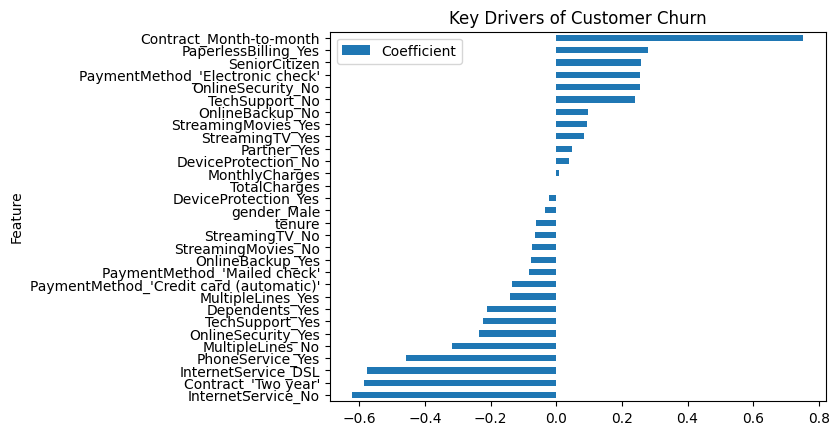

In [ ]:
importance = importance.sort_values(by='Coefficient')

importance.plot(kind='barh', x='Feature', y='Coefficient', title='Key Drivers of Customer Churn')

**Key Drivers of Churn**
The logistic regression model highlights several factors that significantly increase the likelihood of customer churn:
* Customer on month-to-month contracts show the highest churn risk
* Paperless billing customers are more likely to churn
* Senior citizens demonstrate slightly higher churn probability
* Customers paying via electronic check have increased churn risk
* Lack of online security and tech support strongly correlates with churn
* Customers without online backup services also shoe higher churn tendacy

These patterns sugges churn is driven by contract flexibility, service adoption, and support availability rather than just deographics alone

**Business Recommendations**
* Encourage customers to shift from month-to-month to long term contracts
* Promote bundled services including tech support, online security, and backup
* Improve retention strategies for customers using electronic check payments
* Target senior customers with tailored engagement programs
* Focus retention efforts on cusomers without support-related add-on services

Increasing these strategies can reduce churn and increase long-term customer value